In [1]:
from helpers import *
import numpy as np
import pandas as pd
import os
import pickle
from LDA_helpers import process_tweets
import re
from pre_process_text import clean
import gensim
from gensim import corpora, models
import itertools
from gensim.utils import lemmatize

import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt

# visualize a whole string
pd.options.display.max_colwidth = 10000


In [2]:
# Load csv file

data = pd.read_csv('../generated/tweets_n_hashtags.csv', index_col = 0)
data.tweet_text = data.tweet_text.apply(lambda x: x[1:-1]).replace("b'", '', regex=True).replace("'", '', regex=True)
data.tweet_text = data.tweet_text.apply(lambda x: x.split(', '))

In [3]:
def topic_prob_to_topics(topics, nb_topics=1):
    best_topic = []
    for topic in topics:
        if topic:
            best, prob = zip(*topic)
            best_topic.append(int(best[0]))
        else:
            best_topic.append(np.nan)
    return best_topic

def tweet_to_topic_id(tweet):
    series = pd.Series(tweet)
    data_clean = series.apply(lambda x: re.sub(r'http\S+', '', x)).apply(lambda x: re.sub(r"'|\"|`|:|\?|~|,|\.", '', x))
    lemmatized = data_clean.apply(lambda x: lemmatize(x, min_length=3))
    
    processed = []
    for sentence in lemmatized:
        processed.append([gensim.utils.any2unicode(word) for word in sentence])
    
    return processed



# Model for Independent Topic

In [4]:
# SPORTS MODEL

sports = data[data.hashtags == 'Sports']
dictionary_sports = gensim.corpora.Dictionary(sports['tweet_text'])
# create bowcorpus
bow_corpus = [dictionary_sports.doc2bow(doc) for doc in sports['tweet_text']]
# create tf-idf model
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]


# create lda_model'
lda_sports = gensim.models.LdaMulticore(corpus_tfidf, num_topics=1, id2word=dictionary_sports)
dic_sport = set(dict(lda_sports.show_topic(0, 100)).keys())


# TRUMP MODEL
trump = data[data.hashtags == 'Trump Support']
dictionary_trump = gensim.corpora.Dictionary(trump['tweet_text'])
# create bowcorpus
bow_corpus = [dictionary_trump.doc2bow(doc) for doc in trump['tweet_text']]
# create tf-idf model
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]


# create lda_model'
lda_trump = gensim.models.LdaMulticore(corpus_tfidf, num_topics=1, id2word=dictionary_trump)
dic_trump = set(dict(lda_trump.show_topic(0, 100)).keys())

# BLACK MODEL

black = data[data.hashtags == 'Black Support']
dictionary_black = gensim.corpora.Dictionary(black['tweet_text'])
# create bowcorpus
bow_corpus = [dictionary_black.doc2bow(doc) for doc in black['tweet_text']]
# create tf-idf model
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]


# create lda_model'
lda_black = gensim.models.LdaMulticore(corpus_tfidf, num_topics=1, id2word=dictionary_black)
dic_black = set(dict(lda_black.show_topic(0, 100)).keys())


# CRIME MODEL

crime = data[data.hashtags == 'Crime']
dictionary_crime = gensim.corpora.Dictionary(crime['tweet_text'])
# create bowcorpus
bow_corpus = [dictionary_crime.doc2bow(doc) for doc in crime['tweet_text']]
# create tf-idf model
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]


# create lda_model'
lda_crime = gensim.models.LdaMulticore(corpus_tfidf, num_topics=1, id2word=dictionary_crime)
dic_crime = set(dict(lda_crime.show_topic(0, 100)).keys())


# HEALTH MODEL

health = data[data.hashtags == 'Health']
dictionary_health = gensim.corpora.Dictionary(health['tweet_text'])
# create bowcorpus
bow_corpus = [dictionary_crime.doc2bow(doc) for doc in health['tweet_text']]
# create tf-idf model
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]


# create lda_model'
lda_health = gensim.models.LdaMulticore(corpus_tfidf, num_topics=1, id2word=dictionary_health)

dic_health = set(dict(lda_health.show_topic(0, 300)).keys())




# GUN MODEL
gun = data[data.hashtags == 'Gun Related']
dictionary_gun = gensim.corpora.Dictionary(gun['tweet_text'])
# create bowcorpus
bow_corpus = [dictionary_gun.doc2bow(doc) for doc in gun['tweet_text']]
# create tf-idf model
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]


# create lda_model'
lda_gun = gensim.models.LdaMulticore(corpus_tfidf, num_topics=1, id2word=dictionary_gun)
dic_gun = set(dict(lda_gun.show_topic(0, 100)).keys())


# ANTI HILLARY

hillary = data[data.hashtags == 'Anti-Hillary']
dictionary_hillary = gensim.corpora.Dictionary(hillary['tweet_text'])
# create bowcorpus
bow_corpus = [dictionary_hillary.doc2bow(doc) for doc in hillary['tweet_text']]
# create tf-idf model
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]


# create lda_model'
lda_hillary = gensim.models.LdaMulticore(corpus_tfidf, num_topics=1, id2word=dictionary_hillary)

dic_hillary = set(dict(lda_hillary.show_topic(0, 100)).keys())


# ENTERTAINMENT

entertainment = data[data.hashtags == 'Entertainment']
dictionary_entertainment = gensim.corpora.Dictionary(hillary['tweet_text'])
# create bowcorpus
bow_corpus = [dictionary_entertainment.doc2bow(doc) for doc in entertainment['tweet_text']]
# create tf-idf model
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

# create lda_model
lda_entertainment = gensim.models.LdaMulticore(corpus_tfidf, num_topics=1, id2word=dictionary_entertainment)
dic_entertainment = set(dict(lda_entertainment.show_topic(0,100)).keys())


# Weather related



/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/envs/ada/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

In [139]:
dic_weather = set(['air/NN', 'barometer/NN','blizzard/NN','celsius/NN','chill/NN','cirrus/NN','cloud/NN',
           'clouds/NN','cloudy/NN','cold/NN','cyclone/NN','degree/NN','dew/NN','drizzle/NN',
           'dry/NN','fahrenheit/NN','flood/NN','fog/NN','forecast/NN','freeze/NN','frost/NN',
           'hail/NN','heat/NN','hot/NN','humidity/NN','hurricane/NN','ice/NN','lightning/NN',
           'meteorology/NN','moon/NN','precipitation/NN','pressure/NN','radar/NN','rain/NN','rainstorm/NN',
           'rainbow/NN','rainy/NN','sky/NN','sleet/NN','snow/NN','snowstorm/NN','snowy/NN',
           'storm/NN','sun/NN','sunny/NN','temperature/NN','thermometer/NN','thunder/NN','thunderstorm/NN',
           'tornado/NN','tsunami/NN','typhoon/NN','warm/NN','weather/NN','wind/NN','windy/NN'])

# Testing

In [140]:
tweet = ['sports our fans thanks our love for football',
         'anyone watching baseball?', 
         'dont go for hillary, she sucks',
         'trump is a great guy, would make an excellent president',
         'why do black people get targetted by the police?',
         'everyone is racist here',
         'some guy got arrested yesterday',
         'there was a shooting at a school',
         'its important to go to the gym and stay healthy',
         'go to see your doctor if you have fever. you might have measles',
         'got to keep your rifles! Thats America',
         'support our army',
         'hurricane matthew is destroying everything']

test = tweet_to_topic_id(tweet)


In [141]:
test

[['sport/NN', 'fan/NN', 'thank/NN', 'love/NN', 'football/NN'],
 ['anyone/NN', 'watch/VB', 'baseball/NN'],
 ['dont/VB', 'hillary/NN', 'suck/VB'],
 ['trump/NN', 'great/JJ', 'guy/NN', 'make/VB', 'excellent/JJ', 'president/NN'],
 ['black/JJ', 'person/NN', 'get/VB', 'target/VB', 'polouse/NN'],
 ['everyone/NN', 'racist/NN', 'here/RB'],
 ['guy/NN', 'get/VB', 'arrest/VB', 'yesterday/NN'],
 ['shooting/NN', 'school/NN'],
 ['important/JJ', 'gym/NN', 'stay/VB', 'healthy/JJ'],
 ['see/VB', 'doctor/NN', 'have/VB', 'fever/NN', 'have/VB', 'measles/NN'],
 ['get/VB', 'keep/VB', 'rifle/NN', 'that/VB'],
 ['support/VB', 'army/NN'],
 ['hurricane/NN', 'matthew/NN', 'destroy/VB', 'everything/NN']]

In [10]:
test = data[data.hashtags == 'Trump Support']['tweet_text']

In [142]:
# function for retrieving score
def calculate_score(tweet_data, dictionary, weight):
    score_ = []
    for sentence in tweet_data:
        score = 0
        for word in sentence:
            if word in dictionary:
                score += weight
            else: pass
        score_.append(score)
    return score_

In [143]:
score_sport = calculate_score(test, dic_sport, 1)
        
score_trump = calculate_score(test, dic_trump, 1)

score_black = calculate_score(test, dic_black, 1)

score_crime = calculate_score(test, dic_crime, 2)

score_health = calculate_score(test, dic_health, 3)

score_gun = calculate_score(test, dic_gun, 2)

score_hillary = calculate_score(test, dic_hillary, 1)

score_entertainment = calculate_score(test, dic_entertainment, 1)

score_weather = calculate_score(test, dic_weather, 1)

In [145]:

count= 0
for sport, trump, black, crime, health, gun, hillary, entertainment, weather in zip(score_sport,
                                              score_trump,
                                              score_black,
                                              score_crime,
                                              score_health,
                                              score_gun,
                                              score_hillary,
                                              score_entertainment,
                                              score_weather):
    categories = ['sport', 'trump', 'black', 'crime', 'health', 'gun', 'hillary', 'entertainment', 'weather']
    #if np.max([sport, trump, black, crime, health, gun, hillary, entertainment, weather]) == trump:
    #    count+=1
    print(categories[np.argmax([sport, trump, black, crime, health, gun, hillary, entertainment, weather])] + 
          ' with a score of {}'.format(np.max([sport, trump, black, crime, health, gun, hillary, entertainment, weather])))
    
#print(count/len(test))

sport with a score of 3
sport with a score of 1
trump with a score of 2
hillary with a score of 5
crime with a score of 8
black with a score of 1
crime with a score of 4
crime with a score of 4
health with a score of 3
health with a score of 3
gun with a score of 4
gun with a score of 2
weather with a score of 1


# Loading Dataset

In [17]:
from helpers import *
cols_to_extract = [0,1,2,3,4,5,7,8,9,10,11,13,14]
tweets1 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_1.csv', usecols=cols_to_extract)
tweets2 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_2.csv', usecols=cols_to_extract)
tweets3 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_3.csv', usecols=cols_to_extract)
tweets4 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_4.csv', usecols=cols_to_extract) 
tweets5 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_5.csv', usecols=cols_to_extract)
tweets6 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_6.csv', usecols=cols_to_extract)
tweets7 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_7.csv', usecols=cols_to_extract) 
tweets8 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_8.csv', usecols=cols_to_extract) 
tweets9 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_9.csv', usecols=cols_to_extract)

tweets = pd.concat([tweets1,tweets2,tweets3,tweets4,tweets5,tweets6,tweets7,tweets8,tweets9], axis=0)


In [147]:
#complete post_type column with normal tweet category
tweets.post_type.fillna('TWEET', inplace=True)

tweets['content'] = tweets.content.astype(str)

tweets[['external_author_id', 'author', 'region', 'language', 'post_type', 'account_type', 'retweet', 'account_category']] = \
tweets[['external_author_id', 'author', 'region', 'language', 'post_type', 'account_type', 'retweet', 'account_category']].astype('category')

tweets['publish_date'] = pd.to_datetime(tweets['publish_date'], format='%m/%d/%Y %H:%M')

tweets.dtypes

external_author_id          category
author                      category
content                       object
region                      category
language                    category
publish_date          datetime64[ns]
following                      int64
followers                      int64
updates                        int64
post_type                   category
account_type                category
retweet                     category
account_category            category
dtype: object

In [148]:
tweets_processed = tweets[(tweets.publish_date < '2016-11-10')
                          & (tweets.publish_date > '2016-10-01')
                          & (tweets.language == 'English')][['content', 'followers', 'account_category']]

In [149]:
tweets_processed.content = tweets_processed.content.apply(lambda x:
                                                          re.sub(r'http\S+', '', x)
                                                         ).apply(lambda x
                                                                 :re.sub(r"'|\"|`|:|\?|~|,|\.", '', x))




In [150]:
tweets_processed.shape

(136799, 3)

In [151]:
test = tweet_to_topic_id(tweets_processed.content.values)

In [158]:
score_sport = calculate_score(test, dic_sport, 1)
        
score_trump = calculate_score(test, dic_trump, 1)

score_black = calculate_score(test, dic_black, 1)

score_crime = calculate_score(test, dic_crime, 2)

score_health = calculate_score(test, dic_health, 3)

score_gun = calculate_score(test, dic_gun, 1)

score_hillary = calculate_score(test, dic_hillary, 1)

score_entertainment = calculate_score(test, dic_entertainment, 1)

score_weather = calculate_score(test, dic_weather, 2)

In [159]:

sport_ = 0
trump_ = 0
black_ = 0
crime_ = 0
health_ = 0
gun_ = 0
hillary_ = 0
entertainment_ = 0
weather_ = 0

tweet_number = 0

sport_related = []
sport_score = []

trump_related = []
trump_score = []

black_related = []
black_score = []

crime_related = []
crime_score = []

health_related = []
health_score = []

gun_related = []
gun_score = []

hillary_related = []
hillary_score = []

entertainment_related = []
entertainment_score = []

weather_related = []
weather_score = []

for sport, trump, black, crime, health, gun, hillary, entertainment, weather in zip(score_sport,
                                              score_trump,
                                              score_black,
                                              score_crime,
                                              score_health,
                                              score_gun,
                                              score_hillary,
                                              score_entertainment,
                                              score_weather):
    
    categories = ['sport', 'trump', 'black', 'crime', 'health', 'gun', 'hillary', 'entertainment', 'weather']
    winner = np.max([sport, trump, black, crime, health, gun, hillary, entertainment, weather])
    if winner == sport: 
        sport_ += 1
        sport_related.append(tweet_number)
        sport_score.append(sport)
    elif winner == trump:
        trump_ += 1
        trump_related.append(tweet_number)
        trump_score.append(trump)
    elif winner == black:
        black_ += 1
        black_related.append(tweet_number)
        black_score.append(black)
    elif winner == crime:
        crime_ += 1
        crime_related.append(tweet_number)
        crime_score.append(crime)
    elif winner == health:
        health_ += 1
        health_related.append(tweet_number)
        health_score.append(health)
    elif winner == gun:
        gun_ += 1
        gun_related.append(tweet_number)
        gun_score.append(gun)
    elif winner == hillary:
        hillary_ += 1
        hillary_related.append(tweet_number)
        hillary_score.append(hillary)
    elif winner == entertainment:
        entertainment_ += 1
        entertainment_related.append(tweet_number)
        entertainment_score.append(entertainment)
    elif winner == weather:
        weather_ += 1
        weather_related.append(tweet_number)
        weather_score.append(weather)
    tweet_number += 1
        

In [160]:
# calculate percents of categories

print('The percent of sports related shit is: {}'.format(sport_ / len(score_sport) * 100))
print('The percent of trump related shit is: {}'.format(trump_ / len(score_trump) * 100))
print('The percent of black related shit is: {}'.format(black_ / len(score_black) * 100))
print('The percent of crime related shit is: {}'.format(crime_ / len(score_crime) * 100))
print('The percent of health related shit is: {}'.format(health_ / len(score_health) * 100))
print('The percent of gun related shit is: {}'.format(gun_ / len(score_gun) * 100))
print('The percent of anti-hillary related shit is {}'. format(hillary_ / len(score_hillary) * 100))
print('The percent of entertainment shit is {}'.format(entertainment_ / len(score_entertainment) * 100))
print('THe percent of weather shit is {}'.format(weather_ / len(score_weather) * 100))

The percent of sports related shit is: 19.578359490931952
The percent of trump related shit is: 24.66026798441509
The percent of black related shit is: 6.874319256719713
The percent of crime related shit is: 18.998676890912947
The percent of health related shit is: 16.732578454520866
The percent of gun related shit is: 3.0716598805546824
The percent of anti-hillary related shit is 5.657936096024094
The percent of entertainment shit is 3.6703484674595575
THe percent of weather shit is 0.7558534784610998


In [112]:
crime_stuff = tweets_processed.iloc[crime_related][['content']]
crime_stuff['score'] = crime_score

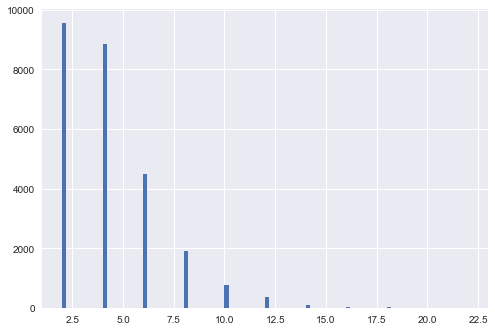

In [113]:
crime_stuff.score.hist(bins=100)


In [114]:
# crime_stuff[crime_stuff.score > 0.015]

In [115]:
entertainment_stuff = tweets_processed.iloc[entertainment_related][['content']]
entertainment_stuff['score'] = entertainment_score

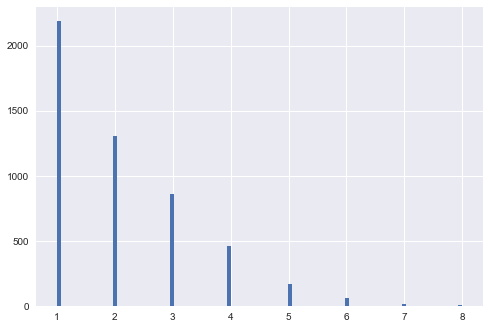

In [116]:
entertainment_stuff.score.hist(bins=100)

In [117]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [164]:
proportions = [len(sport_related)/tweets_processed.shape[0]*100, 
               len(trump_related)/tweets_processed.shape[0]*100, len(black_related)/tweets_processed.shape[0]*100, 
               len(health_related)/tweets_processed.shape[0]*100, len(gun_related)/tweets_processed.shape[0]*100,
              len(hillary_related)/tweets_processed.shape[0]*100, len(entertainment_related)/tweets_processed.shape[0]*100,
               len(weather_related)/tweets_processed.shape[0]*100]
titles = ['sports', 'trump-related', 'black-related', 'crime', 'health', 'gun-related', 'anti-hillary', 'entertainment', 'weather']

In [165]:
proportions

[19.578359490931952,
 24.66026798441509,
 6.874319256719713,
 16.732578454520866,
 3.0716598805546824,
 5.657936096024094,
 3.6703484674595575,
 0.7558534784610998]

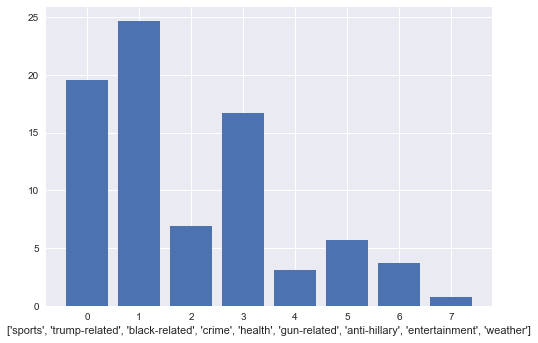

In [168]:
plt.bar(range(8), proportions)
plt.xlabel(titles)
plt.show()

In [161]:
tweets_processed.iloc[weather_related][['content']]


,content
11411,weather *drops below 70* me *whispers* christmas
13328,Floridians warned that Hurricane Matthew could render areas uninhabitable for weeks
13349,ha hulu abc gross ugh blackish tracee ellis ross yuck rainbow johnson blech
13355,Matthew strengthens to Cat 4 hurricane
13372,In Haiti Slow Revelations About The Scale Of Hurricane Destruction
13381,Half a Million Residents Ordered to Flee Georgias Coast as Hurricane Matthew Approaches
13384,Hurricane Matthew Strengthens to Category 4 Storm
20381,The Latest Hurricane #Matthew strengthens to a catastrophic Category 4 storm as it barrels toward Florida coast
20399,#NowPlaying Moon Walken remix ft Kevin Gates & Oj The Juiceman by @Icewear_Vezzo on
20406,Hurricane Matthew Hundreds dead in Haiti storm disaster


In [122]:
gun_stuff

,content
5820,MUST READ
6064,Then Me I want McDonalds Mom Do you have McDonalds money Now Mom I want grandkids Me Do you have grandkids money
6078,The scene about an hour ago on Hwy 1806 as policr attempt to force Oceti Sakowin Sioux tribes to allow DAPL on their treaty land #NoDAPL
11439,When your friend sends you this from the airport!! Wow!�LAX Tom Bradley International Terminal Gate 152 #TreatMeSweet #Sugarpova
11515,Always a pleasure to spend time with my dear friend and role model Ralf Moeller! Thanks for…
11565,@MariaSharapova wears @Nike Sportswear rally crewneck sweatshirt out in NYC
11610,Here for a reason
11687,Hair ready with @hairbyadir #CFDA #Vogue
11968,no offence but using an online translator when it isnt even necessary sort of indicates the level of discussion one is capable of
11969,I was about to ask how on earth is the US scene worthless if it has 1000s of dope artists then i read your other rants No more qs


# Topics and Swing States

In [123]:

florida = tweets_processed[tweets_processed.content.str.contains('Florida|florida')]

In [124]:
florida

,content,followers,account_category
13325,To my #Florida #folllwers be safe with #HurricaneMatthew coming!,1052,LeftTroll
20111,Dont forget Florida Your voter registration deadline is tomorrow 10/18 at 5pm ET Make sure youre registered at,902,LeftTroll
20381,The Latest Hurricane #Matthew strengthens to a catastrophic Category 4 storm as it barrels toward Florida coast,893,LeftTroll
25656,HurricaneMattew is a category 4 storm heading near #WestPalmBeach #Florida with winds up to 140MPH Follow evacuation procedures & be safe,932,LeftTroll
25738,Attention #Artists #DJs & #Producers - #Coast2Coast is coming to #Orlando #Florida on 11/16/16 Come network!,932,LeftTroll
25743,Hurricane Matthew could make a U-turn and hit Florida twice,933,LeftTroll
25799,NEWS #Weather Instead of weakening Hurricane Matthew is strengthening and could be back to Category 5 before hitting Florida,933,LeftTroll
25836,The surfers in Florida are on all highs,934,LeftTroll
25937,Last Case of Water at #Walmart #MiamiGardens #hurricanematthew #damn @ Miami Gardens Florida,939,LeftTroll
25970,When you live in the hood and youre poor you thug shit out Hurricanes are a part of life in Florida and we dont run like no bitch,940,LeftTroll


In [128]:
thing = 'Hurricane Matthew'
tweets[tweets.content.str.contains(thing)]


,external_author_id,author,content,region,language,publish_date,following,followers,updates,post_type,account_type,retweet,account_category
13328,1.709314e+09,AANTIRACIST,Floridians warned that Hurricane Matthew could render areas 'uninhabitable for weeks' https://t.co/vyjEZelj2s,United States,English,2016-10-06 13:53:00,997,1052,1693,RETWEET,left,1,LeftTroll
13384,1.709314e+09,AANTIRACIST,Hurricane Matthew Strengthens to Category 4 Storm: https://t.co/b01AhEAEQM https://t.co/7VGeX5OoKG,United States,English,2016-10-06 17:05:00,997,1054,1755,RETWEET,left,1,LeftTroll
20406,1.652139e+09,ACEJINEV,Hurricane Matthew: Hundreds dead in Haiti storm disaster https://t.co/qy7LL2SRzI,United States,English,2016-10-07 07:34:00,807,893,1349,RETWEET,left,1,LeftTroll
25696,1.670762e+09,ADAMCHAPMANJR,Hurricane Matthew need to chill the fuck out,United States,English,2016-10-06 18:41:00,582,932,1647,RETWEET,left,1,LeftTroll
25743,1.670762e+09,ADAMCHAPMANJR,Hurricane Matthew could make a U-turn and hit Florida twice https://t.co/4fhwPC0zej,United States,English,2016-10-06 20:36:00,582,933,1700,RETWEET,left,1,LeftTroll
25799,1.670762e+09,ADAMCHAPMANJR,"NEWS: #Weather Instead of weakening, Hurricane Matthew is strengthening, and could be back to Category 5 before hitting Florida.",United States,English,2016-10-06 20:53:00,582,933,1771,RETWEET,left,1,LeftTroll
25908,1.670762e+09,ADAMCHAPMANJR,At least 108 people have died in Haiti as a result of Hurricane Matthew https://t.co/IkfYblvNLd https://t.co/KHIDV0ZxyG,United States,English,2016-10-06 21:23:00,582,936,1896,RETWEET,left,1,LeftTroll
26244,1.670762e+09,ADAMCHAPMANJR,The Latest on Hurricane Matthew: Hurricane conditions expected to reach Florida in next few hours. https://t.co/5fFWVuVy7c,United States,English,2016-10-07 07:30:00,582,949,2289,RETWEET,left,1,LeftTroll
60535,1.652987e+09,ALECMOOOOODY,▶ WATCH: Video from the Bahamas as Hurricane Matthew hits https://t.co/3c45DgpXQB @ABC7NY https://t.co/l4eyNW5meH,United States,English,2016-10-06 12:32:00,529,879,1429,RETWEET,left,1,LeftTroll
60752,1.652987e+09,ALECMOOOOODY,Heartbreaking photos & stories from Haiti @BillClinton Hurricane Matthew: New images show scale of Haiti destruction https://t.co/0o2FFOR5gv,United States,English,2016-10-06 15:46:00,529,885,1681,RETWEET,left,1,LeftTroll
